# Simple Linear Regression

In [3]:
## pip install scikit-learn



import pandas as pd
import os
from pathlib import Path

cwd = os.getcwd()

In [4]:
data = pd.read_csv(Path(cwd, 'boston.csv'))

## Data Description


    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [5]:
data.shape

(506, 15)

In [6]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
3.677083 + 1.5 * (3.677083 - 0.082045)

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot: >

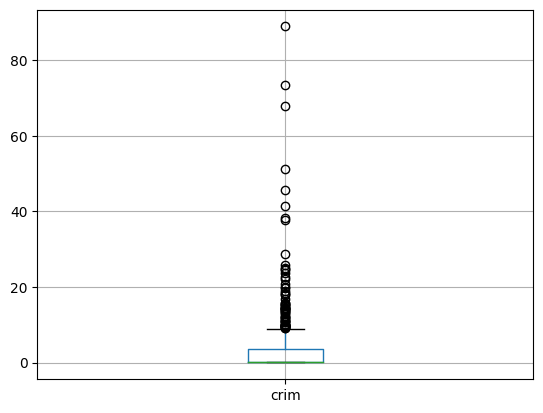

In [10]:
data.boxplot('crim')

In [11]:
data.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [12]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [13]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Let us take out the dependent and indpendent vaiables from the dataset

In [14]:
data.loc[:,['lstat','medv']].head(5)

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


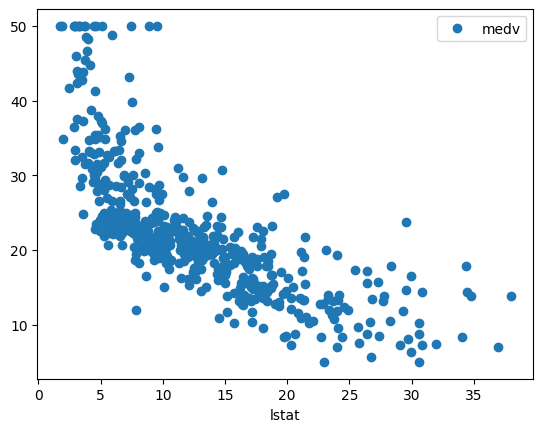

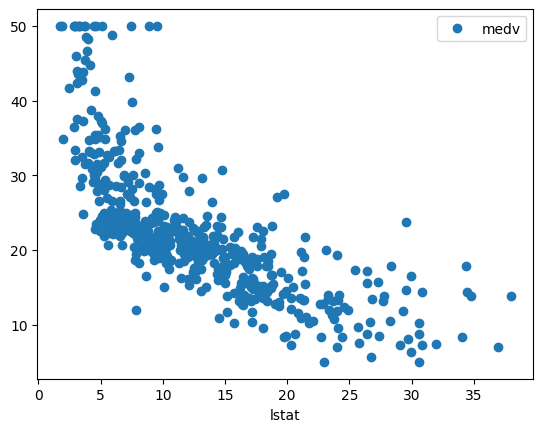

In [16]:
from matplotlib import pyplot as plt

data.plot(x='lstat',y='medv',style='o')
plt.show()

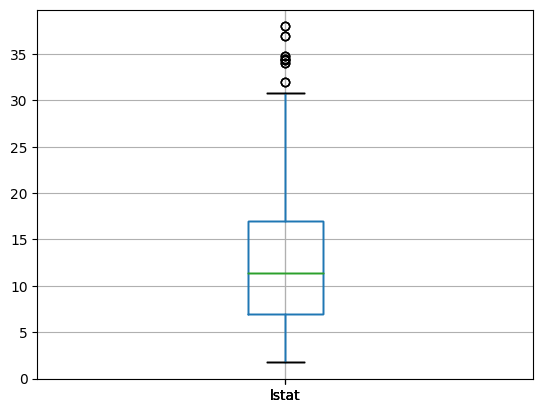

In [19]:
data.boxplot('lstat')
plt.show()

In [ ]:
data.plot(x='rm',y='medv',style='o')

In [ ]:
data.boxplot('rm')

In [ ]:
data.plot(x='age',y='medv',style='o')

In [ ]:
data.boxplot('age')

In [20]:
%pip install seaborn
import seaborn as sns

sns.kdeplot(x='lstat', data=data)


     ------------------------------------ 293.3/293.3 kB 318.0 kB/s eta 0:00:00


<AxesSubplot: xlabel='lstat', ylabel='Density'>

In [23]:
sns.kdeplot(x='rm', data=data)

<AxesSubplot: xlabel='lstat', ylabel='Density'>

In [22]:
sns.kdeplot(x='age', data=data)

<AxesSubplot: xlabel='lstat', ylabel='Density'>

# Preparing data

In [24]:
X = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])

In [25]:
X.shape, y.shape

((506, 1), (506, 1))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 1)
(152, 1)
(354, 1)
(152, 1)


In [30]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [31]:
X_test.head()

,lstat
305,8.93
193,5.03
65,4.67
349,5.89
151,13.28


In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

In [34]:
print(regressor.intercept_)

[34.04878548]


In [35]:
print(regressor.coef_)

## y_pred = 34.12 -0.91*X_test
## y_pred = 34.12 - 0.91 * 5

[[-0.93128018]]


In [36]:
y_pred = regressor.predict(X_test)
#print(type(y_pred))
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [37]:
y_pred

,Predicted
0,25.732453
1,29.364446
2,29.699707
3,28.563545
4,21.681385
...,...
147,28.675299
148,25.881458
149,24.512476
150,20.526597


In [38]:
34.0076432 - 0.93136988*5

29.350793799999998

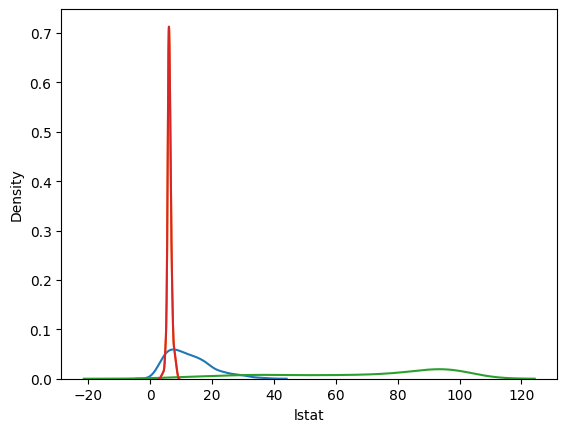

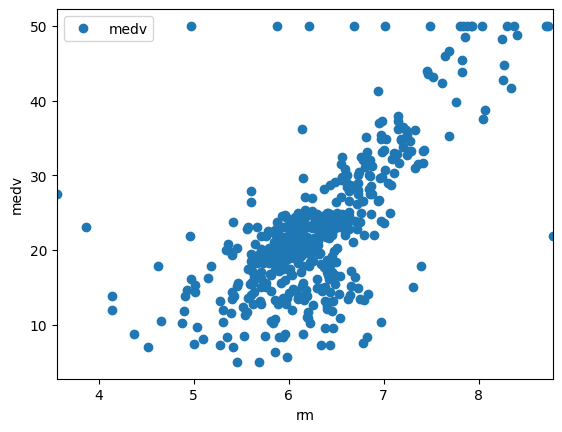

In [39]:
import matplotlib.pyplot as plt
data.plot(x='rm',y='medv',style='o')
plt.xlabel('rm')
plt.ylabel('medv')
plt.xlim(min(data['rm']), max(data['rm']))
plt.show()

In [40]:
cross_val_score?

Object `cross_val_score` not found.


In [41]:
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training Accuracy:', cross_val_score(regressor, X_train, y_train, scoring='r2', cv = 10).mean())
print('Test Accuracy:', cross_val_score(regressor, X_test, y_test, scoring='r2', cv = 10).mean())
train_cross_score = cross_val_score(regressor, X_train, y_train, scoring='r2', cv = 10)
print(train_cross_score)
print(train_cross_score.mean())

test_cross_score = cross_val_score(regressor, X_test, y_test, scoring='r2', cv = 10)
print(test_cross_score)
print(test_cross_score.mean())

Mean Absolute Error: 4.893290454986384
Mean Squared Error: 47.496646586619896
Root Mean Squared Error: 6.891781089574733
Training Accuracy: 0.5259977865029362
Test Accuracy: 0.37331961127298596
[0.69003519 0.60127342 0.46787731 0.66937674 0.42728757 0.47331678
 0.6452429  0.6064234  0.22922743 0.44991711]
0.5259977865029362
[ 0.45060745  0.28794485  0.62339185  0.54114089  0.20361653  0.30874948
 -0.53418474  0.4698948   0.85582736  0.52620764]
0.37331961127298596


# Mulitple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
dataset = pd.read_csv(os.path.join(cwd, 'boston.csv'))
dataset.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
dataset.describe()

In [ ]:
dataset.corr()

In [ ]:
#X = pd.DataFrame(dataset.iloc[:,:-1])
X = pd.DataFrame(dataset[['crim', 'chas', 'nox', 'rm', 'dis', 'rad','ptratio', 'lstat']])
y = pd.DataFrame(dataset.iloc[:,-1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
regressor.intercept_

In [ ]:
regressor.coef_

In [ ]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])
regressor.intercept_

In [ ]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

In [ ]:
y_pred = regressor.predict(X_test)
#y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
#y_pred

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:', cross_val_score(regressor, X_train, y_train, scoring='r2', cv = 10).mean())

In [ ]:
print('Accuracy:', cross_val_score(regressor, X_test, y_test, scoring='r2', cv = 10).mean())

In [ ]:
import numpy as np

lst = np.arange(-100,100)

sqd_lst = [i*i for i in lst]

cube_lst = [i*i*i for i in lst]

In [ ]:
plt.plot(lst, sqd_lst)

In [ ]:
plt.plot(lst, cube_lst)

In [ ]:
X.columns

In [ ]:
dataset.plot(x='age', y='medv', style='o')

In [ ]:
dataset[dataset['age'] >= 90]

### try removing outliers ==> If you remove too much of data then train test wont have enough data .. be dilligent
### age as a qualititive value ==> Discrete ==> Age is old or new or medium
### Try picking different combination of columns